# 머신러닝 프레임워크 : scikit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하면 샘플데이터로 제공한다

In [1]:
# XOR 연산 학습해보기
xor_input = [
  [0,0,0],
  [0,1,1],
  [1,0,1],
  [1,1,0],
]

In [5]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2] # Feature Columns
xor_label = xor_df.iloc[:,2] # Target Column
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [6]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

clf = svm.SVC()
clf.fit(xor_data, xor_label)
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [7]:
# 정답률 구하기
ac_score = metrics.accuracy_score(xor_label, pred)
print("정답률 :",ac_score)

1.0


In [13]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
# 전체 데이터를 가지고 overfitting underfitting 따지는 것
clf.score(xor_data, xor_label)

1.0

In [15]:
# iris 분류하기
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# 기본 통계량 확인하기
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# NaN 확인하기
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [23]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
# 품종별로 Color 컬럼 추가
iris.loc[iris["Name"] == "Iris-setosa","Color"] = "red"
iris.loc[iris["Name"] == "Iris-versicolor","Color"] = "green"
iris.loc[iris["Name"] == "Iris-virginica","Color"] = "blue"

In [ ]:
# 쌤 코드
# color_tmp = []

# for name in iris["Name"]:
#   if name == "Iris-setosa":
#     color_tmp.append("red")
#   elif name == "Iris-versicolor":
#     color_tmp.append("green")
#   else:
#     color_tmp.append("blue")

# iris["Color"] = color_tmp
# iris.head()

In [34]:
# Scatter 그려보기
import matplotlib.pyplot as plt

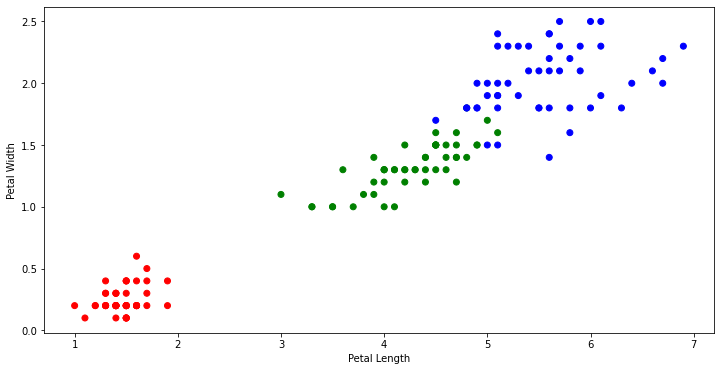

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(
  iris.PetalLength, 
  iris.PetalWidth,
  c=iris.Color
  )
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [47]:
# 머신러닝을 위한 작업
iris_data = iris.iloc[:,0:4]
iris_label = iris.Name
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [48]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)
print(train_data.head())
print(test_data.head())
print("-"*10)
print(train_label.head())
print(test_label.head())

     SepalLength  SepalWidth  PetalLength  PetalWidth
77           6.7         3.0          5.0         1.7
65           6.7         3.1          4.4         1.4
124          6.7         3.3          5.7         2.1
149          5.9         3.0          5.1         1.8
94           5.6         2.7          4.2         1.3
     SepalLength  SepalWidth  PetalLength  PetalWidth
6            4.6         3.4          1.4         0.3
85           6.0         3.4          4.5         1.6
25           5.0         3.0          1.6         0.2
1            4.9         3.0          1.4         0.2
128          6.4         2.8          5.6         2.1
----------
77     Iris-versicolor
65     Iris-versicolor
124     Iris-virginica
149     Iris-virginica
94     Iris-versicolor
Name: Name, dtype: object
6          Iris-setosa
85     Iris-versicolor
25         Iris-setosa
1          Iris-setosa
128     Iris-virginica
Name: Name, dtype: object
